# Predicting the “Driving Style”

### Problem Description

Road safety rules and regulations are designed to prevent the citizens from fatal incidents. Although policies are in place, we observe negligent behavior of the drivers which lead to serious injuries or death crashes. It is of utmost interest of the authorities to understand and analyze human behavior to take necessary corrective and preventive actions.  

The stakeholders are the citizens, road transport authorities, Insurers and Researchers/Data service providers. In order to design a driving assistance system there is a need to get an understanding of the data on the driving patterns and broadly distinguish bad drivers from good ones. This in turn will benefit Insurers in analyzing underwriting risks, prevent frauds and designing No-claim-discount systems (NCD systems), etc. Additionally, the concerned authorities will need insights to design benchmarks for qualifications and driver licensing regulations, etc.


Every single vehicle is observed at various time stamps, to record the details of trips made, traffic conditions, vehicle details like length, weight, no of axles of the vehicle, road conditions, lanes switched, weather conditions etc. along with the driving styles are recorded. 

### Aggressive driver : 
The roads are often a dangerous place to be due to the number of people who choose not to drive safely. Roads are full of people who speed, don’t use turn signals, merge without warning, drive too close to other vehicles, honk and yell at other drivers and endanger the lives of not only themselves, but everyone else on the road through their reckless driving. People who drive without consideration for the safety of others on the road, sometimes even causing car accidents, are called aggressive drivers.



### “1” indicates : “Aggressive”, 
### “2” indicates : ”Normal” and 
### “3” indicates : “Vague” 


# Importing libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing, metrics, cross_validation
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import squarify # for tree maps
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

C:\Users\panch\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
init_notebook_mode(connected=True)

# Reading train and test data

In [3]:
# Change directory
path = os.getcwd() 
os.chdir( path )

In [4]:

train_data=pd.read_csv("Train.csv",na_values=["?",","])
print(train_data.shape)

(12994, 5)


In [5]:
vehicle_data=pd.read_csv("Train_Vehicletravellingdata.csv",na_values=["?",","])
print(vehicle_data.shape)
#print(vehicle_data.info())

(162566, 10)


In [6]:
weather_data=pd.read_csv("Train_WeatherData.csv",na_values=["?",","])
print(weather_data.shape)
#print(weather_data.info())


(162566, 9)


# viewing the train data

In [7]:
train_data.head(3)

,ID,V2,V5,V6,DrivingStyle
0,DR_24526,1265,10243,2,2
1,DR_30052,1680,30871,6,2
2,DR_40928,936,3224,4,2


In [8]:
train_copy = train_data.copy()
train_copy.drop(['ID'], axis=1, inplace=True)
train_copy.rename(columns={'V2':'vehicle_length', 'V5':'vehicle_weight', 'V6':'axles_no'}, inplace=True)
train_copy['target'] = train_copy['DrivingStyle'].map({1:'Aggressive', 2: 'Normal', 3: 'Vague'})
train_copy.drop(['DrivingStyle'], axis=1, inplace=True)

In [9]:
train_copy.head()

,vehicle_length,vehicle_weight,axles_no,target
0,1265,10243,2,Normal
1,1680,30871,6,Normal
2,936,3224,4,Normal
3,1503,3315,4,Normal
4,929,3022,4,Normal


### vehicle Data

In [10]:
vehicle_data.head(3)

,ID,V1,V3,V4,V7,V8,V9,V10,V11,V18
0,DR_24526,2012-03-21 09:14:55,1,81,57227,87,16986,941,94.0,Dry
1,DR_24526,2012-03-21 09:15:07,1,88,57229,81,1708,551,11.0,Dry
2,DR_24526,2012-03-21 09:15:12,1,88,57230,88,22892,1698,4.0,Dry


### Weather Details

In [11]:
weather_data.tail(3)

,ID,V1,V12,V13,V14,V15,V16,V17,V19
162563,DR_69505,2013-04-30 16:55:21,9.0,rain,Low,91.0,45.0,8.0,night
162564,DR_56117,2013-04-30 16:55:23,9.0,snow,Moderate,91.0,45.0,8.0,night
162565,DR_56117,2013-04-30 16:57:08,9.0,snow,Moderate,91.0,45.0,8.0,night


### Shapes of all 3 cvs files

In [12]:
train_data.shape

(12994, 5)

In [13]:
weather_data.shape

(162566, 9)

In [14]:
vehicle_data.shape

(162566, 10)

### Merge 3 csv files 

In [15]:
train_data.isna().sum()

ID              0
V2              0
V5              0
V6              0
DrivingStyle    0
dtype: int64

In [16]:
vehicle_data.isna().sum()

ID        0
V1        0
V3        0
V4        0
V7        0
V8        0
V9        0
V10       0
V11    2455
V18       0
dtype: int64

In [17]:
weather_data.isna().sum()

ID        0
V1        0
V12    2057
V13       0
V14       0
V15    2105
V16    2114
V17    2464
V19       0
dtype: int64

In [18]:
vehicle_wether=pd.merge(vehicle_data,weather_data, on=["ID", "V1"])
vehicle_wether.shape

(162566, 17)

In [19]:
vehicle_wether.isna().sum()

ID        0
V1        0
V3        0
V4        0
V7        0
V8        0
V9        0
V10       0
V11    2455
V18       0
V12    2057
V13       0
V14       0
V15    2105
V16    2114
V17    2464
V19       0
dtype: int64

In [20]:
train=pd.merge(vehicle_wether,train_data, on=["ID"])
train.shape

(162566, 21)

In [21]:
train.isna().sum()

ID                 0
V1                 0
V3                 0
V4                 0
V7                 0
V8                 0
V9                 0
V10                0
V11             2455
V18                0
V12             2057
V13                0
V14                0
V15             2105
V16             2114
V17             2464
V19                0
V2                 0
V5                 0
V6                 0
DrivingStyle       0
dtype: int64

In [22]:
train.head(3)

,ID,V1,V3,V4,V7,V8,V9,V10,V11,V18,...,V13,V14,V15,V16,V17,V19,V2,V5,V6,DrivingStyle
0,DR_24526,2012-03-21 09:14:55,1,81,57227,87,16986,941,94.0,Dry,...,clear,None,95.0,146.0,1.0,daylight,1265,10243,2,2
1,DR_24526,2012-03-21 09:15:07,1,88,57229,81,1708,551,11.0,Dry,...,clear,None,95.0,124.0,0.0,daylight,1265,10243,2,2
2,DR_24526,2012-03-21 09:15:12,1,88,57230,88,22892,1698,4.0,Dry,...,clear,None,95.0,124.0,0.0,daylight,1265,10243,2,2


### Rename the column Names  after merge

In [23]:
train.rename(columns={'ID':'id','V1':'trip_date_time', 'V3':'road_lane', 'V4':'vehicle_speed', 'V7':'preceed_vehicle_id', 'V8':'preceed_vehicle_speed', 'V9':'preceed_vehicle_wght', 'V10':'preceed_vehicle_lnght', 'V11':'time_gap', 'V18':'road_condition', 'V12':'air_tempture','V13':'precipitation_type', 'V14':'precipitation_intnsty', 'V15':'relativ_humidity', 'V16':'wind_direction', 'V17':'wind_speed', 'V19':'light_condition', 'V2':'vehicle_length', 'V5':'vehicle_weight', 'V6':'axles_no'}, inplace=True)

In [24]:
train.columns

Index(['id', 'trip_date_time', 'road_lane', 'vehicle_speed',
       'preceed_vehicle_id', 'preceed_vehicle_speed', 'preceed_vehicle_wght',
       'preceed_vehicle_lnght', 'time_gap', 'road_condition', 'air_tempture',
       'precipitation_type', 'precipitation_intnsty', 'relativ_humidity',
       'wind_direction', 'wind_speed', 'light_condition', 'vehicle_length',
       'vehicle_weight', 'axles_no', 'DrivingStyle'],
      dtype='object')

### Check for NA values

In [25]:
train.isna().sum()

id                          0
trip_date_time              0
road_lane                   0
vehicle_speed               0
preceed_vehicle_id          0
preceed_vehicle_speed       0
preceed_vehicle_wght        0
preceed_vehicle_lnght       0
time_gap                 2455
road_condition              0
air_tempture             2057
precipitation_type          0
precipitation_intnsty       0
relativ_humidity         2105
wind_direction           2114
wind_speed               2464
light_condition             0
vehicle_length              0
vehicle_weight              0
axles_no                    0
DrivingStyle                0
dtype: int64

In [26]:
percent_missing = train.isnull().sum() * 100 / len(train)
percent_missing

id                       0.000000
trip_date_time           0.000000
road_lane                0.000000
vehicle_speed            0.000000
preceed_vehicle_id       0.000000
preceed_vehicle_speed    0.000000
preceed_vehicle_wght     0.000000
preceed_vehicle_lnght    0.000000
time_gap                 1.510156
road_condition           0.000000
air_tempture             1.265332
precipitation_type       0.000000
precipitation_intnsty    0.000000
relativ_humidity         1.294859
wind_direction           1.300395
wind_speed               1.515692
light_condition          0.000000
vehicle_length           0.000000
vehicle_weight           0.000000
axles_no                 0.000000
DrivingStyle             0.000000
dtype: float64

### Features "time_gap" , "air_tempture", "relativ_humidity", "wind_direction","wind_speed" has 1% NA values compared to length of Data, so dropping those NA's

In [27]:
print(train.shape)
train.dropna(inplace=True)
print(train.shape)

(162566, 21)
(157675, 21)


In [28]:
train.isna().sum()

id                       0
trip_date_time           0
road_lane                0
vehicle_speed            0
preceed_vehicle_id       0
preceed_vehicle_speed    0
preceed_vehicle_wght     0
preceed_vehicle_lnght    0
time_gap                 0
road_condition           0
air_tempture             0
precipitation_type       0
precipitation_intnsty    0
relativ_humidity         0
wind_direction           0
wind_speed               0
light_condition          0
vehicle_length           0
vehicle_weight           0
axles_no                 0
DrivingStyle             0
dtype: int64

In [29]:
train.describe()

,road_lane,vehicle_speed,preceed_vehicle_id,preceed_vehicle_speed,preceed_vehicle_wght,preceed_vehicle_lnght,time_gap,air_tempture,relativ_humidity,wind_direction,wind_speed,vehicle_length,vehicle_weight,axles_no,DrivingStyle
count,157675.000000,157675.000000,157675.000000,157675.000000,157675.000000,157675.000000,157675.000000,157675.000000,157675.000000,157675.000000,157675.000000,157675.000000,157675.000000,157675.000000,157675.000000
mean,1.500739,83.513956,459778.788559,83.516385,5037.604484,792.191172,105.189034,4.654936,60.672643,182.372856,4.190557,866.345768,6037.760812,2.848568,2.147240
std,0.500001,9.374488,272275.013418,9.372316,7422.821078,483.077821,176.920447,3.226376,18.288689,88.915472,3.026910,495.420837,7991.583778,1.467823,0.669014
min,1.000000,8.000000,20.000000,0.000000,3.000000,102.000000,1.000000,-13.000000,16.000000,6.000000,0.000000,155.000000,44.000000,2.000000,1.000000
25%,1.000000,78.000000,143048.500000,78.000000,1504.000000,527.000000,7.000000,2.000000,46.000000,152.000000,1.000000,550.000000,1625.000000,2.000000,2.000000
50%,2.000000,83.000000,593901.000000,83.000000,1863.000000,560.000000,43.000000,5.000000,58.000000,180.000000,4.000000,577.000000,2015.000000,2.000000,2.000000
75%,2.000000,88.000000,692317.500000,88.000000,2672.000000,704.000000,125.000000,7.000000,76.000000,208.000000,7.000000,1062.000000,6265.000000,3.000000,3.000000
max,2.000000,161.000000,794435.000000,161.000000,69548.000000,2981.000000,1797.000000,24.000000,97.000000,360.000000,17.000000,2337.000000,57230.000000,9.000000,3.000000


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157675 entries, 0 to 162565
Data columns (total 21 columns):
id                       157675 non-null object
trip_date_time           157675 non-null object
road_lane                157675 non-null int64
vehicle_speed            157675 non-null int64
preceed_vehicle_id       157675 non-null int64
preceed_vehicle_speed    157675 non-null int64
preceed_vehicle_wght     157675 non-null int64
preceed_vehicle_lnght    157675 non-null int64
time_gap                 157675 non-null float64
road_condition           157675 non-null object
air_tempture             157675 non-null float64
precipitation_type       157675 non-null object
precipitation_intnsty    157675 non-null object
relativ_humidity         157675 non-null float64
wind_direction           157675 non-null float64
wind_speed               157675 non-null float64
light_condition          157675 non-null object
vehicle_length           157675 non-null int64
vehicle_weight           15

# visualising patterns

In [31]:
train['target'] = train['DrivingStyle'].map({1:'aggressive', 2: 'normal', 3: 'vague'})

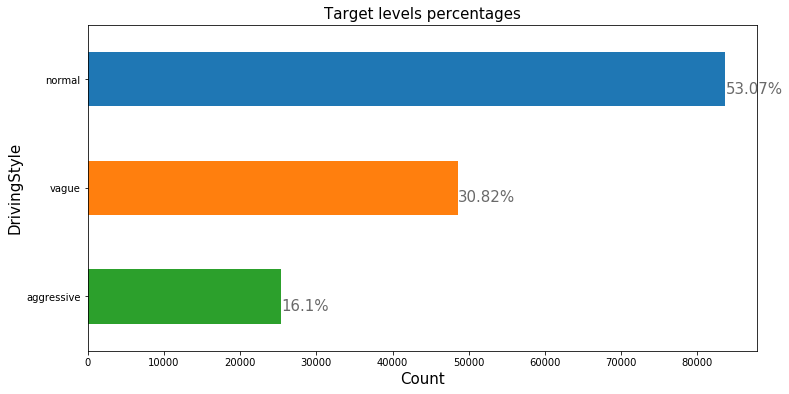

In [32]:
ax = train['target'].value_counts().plot(kind='barh', figsize= (12,6))
ax.set_title("Target levels percentages", fontsize=15)
ax.set_xlabel("Count", fontsize=15)
ax.set_ylabel("DrivingStyle", fontsize=15)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

plt.show()

In the above plot, we can see that percentage of DrivingStyle 3 class's , "Aggressive" percentage is less comparitive to other classes.

### How speed of the vehicle varies according to Road condtions

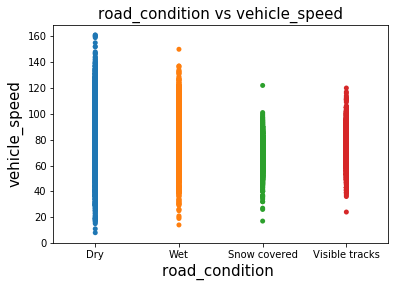

In [33]:
ax = sns.stripplot(x="road_condition", y="vehicle_speed", data=train);
ax.set_title("road_condition vs vehicle_speed", fontsize=15)
ax.set_xlabel("road_condition ", fontsize=15)
ax.set_ylabel("vehicle_speed", fontsize=15)
plt.show()

import seaborn as sns
sns.barplot(x="road_condtion", y="vehicle_speed", data=train);

From above graph , can observe that speed ranges from very low to high when Road condition is dry , and when wet, speed < 140kph most of the cases and snow covered road speed maintained from 20+ KPH to ~100kph. when road clearly visible, minimum speed maintained looks like 40kph+

### How speed of vehicle varies according to Weather precipitation type

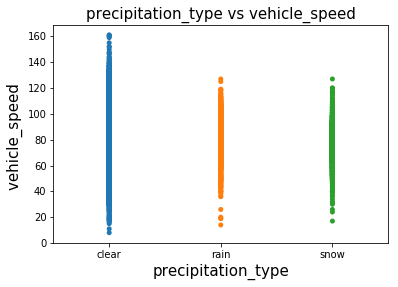

In [35]:
ax = sns.stripplot(x="precipitation_type", y="vehicle_speed", data=train);
ax.set_title("precipitation_type vs vehicle_speed", fontsize=15)
ax.set_xlabel("precipitation_type", fontsize=15)
ax.set_ylabel("vehicle_speed ", fontsize=15)
plt.show()

###  How vehicle weight impacts vehicle speed on differnt road conditions ('Dry', 'Wet', 'Visible tracks','Snow covered')

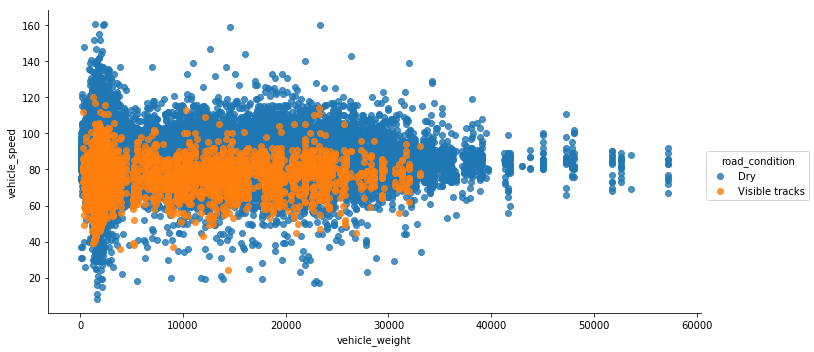

In [36]:
sns.lmplot(x='vehicle_weight', y='vehicle_speed', hue='road_condition',aspect=2,size=5,
           data=train.loc[train['road_condition'].isin(['Dry', 'Visible tracks'])], 
           fit_reg=False)

From above graph, vehicle speed is high for low weight , as weight increases speed dicreases , when road condition is Dry, and road condion is in visible tarcks , heavy veicles observations are less , means they may stop their movement or observations might be less for heaviour vehicles here.

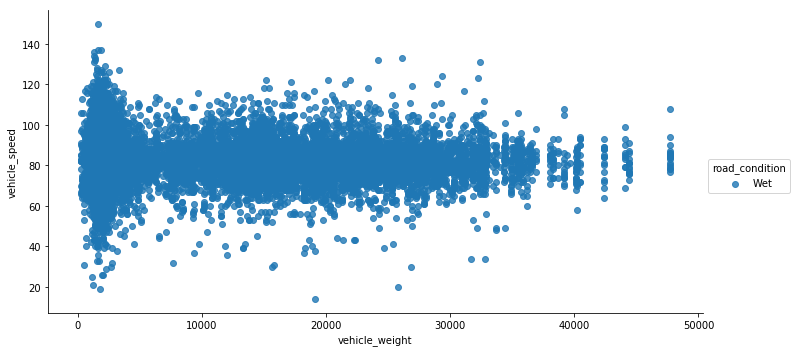

In [37]:
sns.lmplot(x='vehicle_weight', y='vehicle_speed', hue='road_condition',aspect=2,size=5,
           data=train.loc[train['road_condition'].isin(['Wet'])], 
           fit_reg=False)

IN wet road condition, variation speed is less of vehicles which have weight between 10000 to < 30000

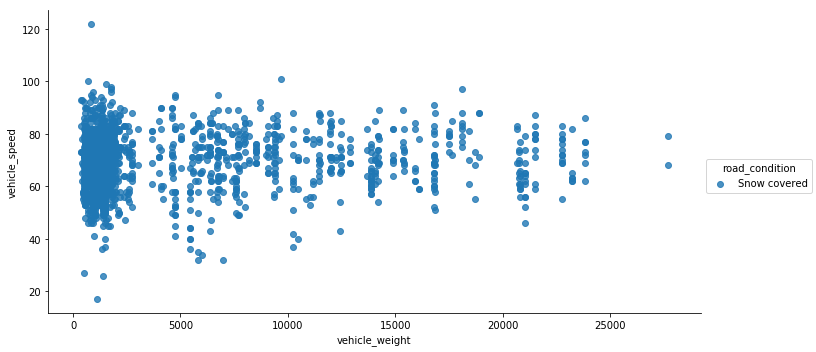

In [38]:
sns.lmplot(x='vehicle_weight', y='vehicle_speed', hue='road_condition',aspect=2,size=5,
           data=train.loc[train['road_condition'].isin(['Snow covered'])], 
           fit_reg=False)

We could see data light weight vehicle maximum speed 100kph when road is snow covered

### How vehicle lenght impacts vehicle speed on differnt Light conditions ('daylight', 'twilight', 'night') on the time of the day

In [39]:
train['light_condition'].unique()

array(['daylight', 'twilight', 'night'], dtype=object)

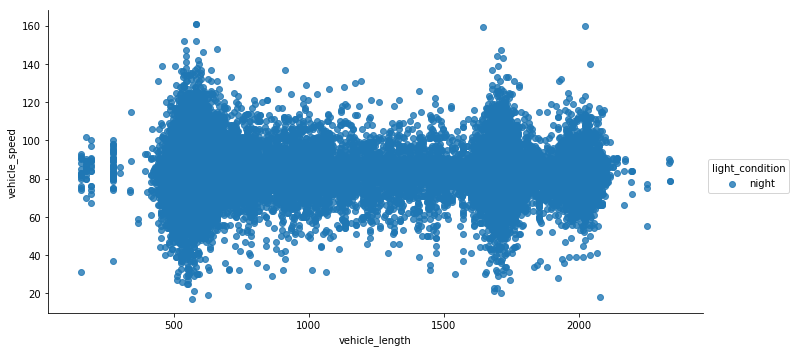

In [40]:
sns.lmplot(x='vehicle_length', y='vehicle_speed', hue='light_condition',aspect=2,size=5,
           data=train.loc[train['light_condition'].isin(['night'])], 
           fit_reg=False)

from above graph, speed is 120kph+ for vehicles length 500+ cm and ~1700 cm and lenghty vehicles(~2000cm), speed variation is less in night time

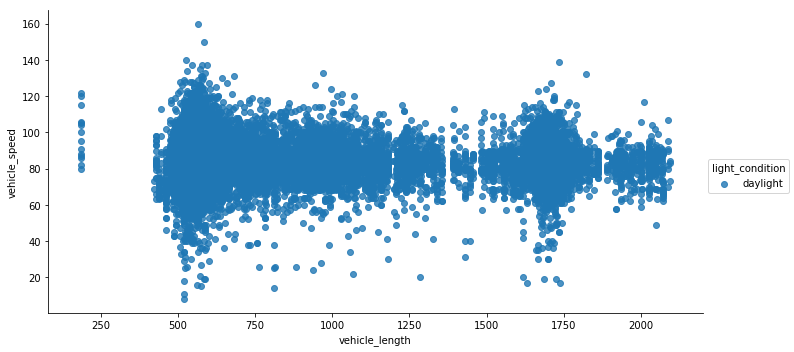

In [41]:
sns.lmplot(x='vehicle_length', y='vehicle_speed', hue='light_condition',aspect=2,size=5,
           data=train.loc[train['light_condition'].isin(['daylight'])], 
           fit_reg=False)

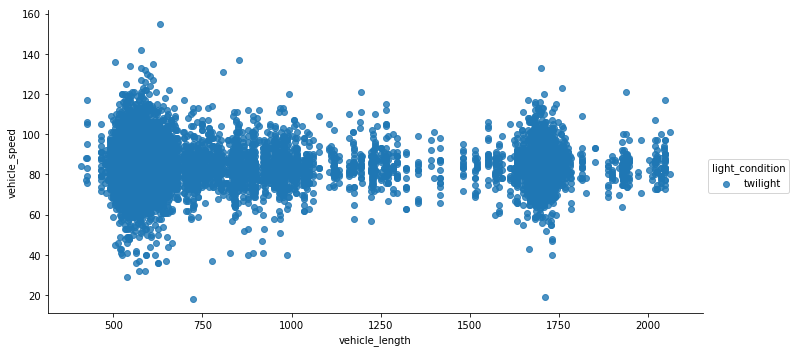

In [42]:
# sns.stripplot(x="light_condition", y="vehicle_speed", data=train);
sns.lmplot(x='vehicle_length', y='vehicle_speed', hue='light_condition',aspect=2,size=5,
           data=train.loc[train['light_condition'].isin(['twilight'])], 
           fit_reg=False)

### How vehicle lenght impacts vehicle speed on differnt weather types conditions ('clear', 'rain', 'snow') on the time of the day

In [50]:
train['precipitation_type'].unique()

array(['clear', 'rain', 'snow'], dtype=object)

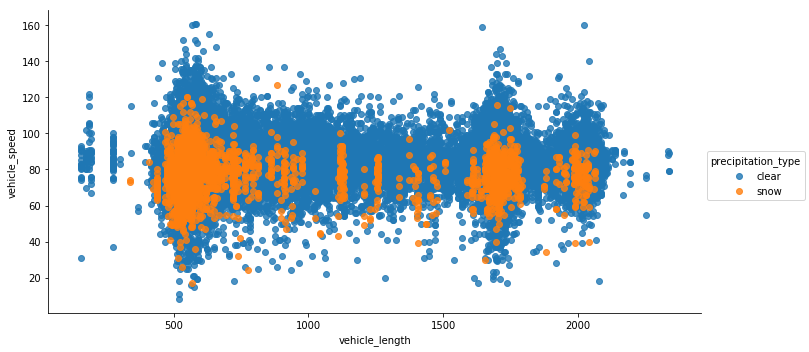

In [45]:
# sns.stripplot(x="light_condition", y="vehicle_speed", data=train);
sns.lmplot(x='vehicle_length', y='vehicle_speed', hue='precipitation_type',aspect=2,size=5,
           data=train.loc[train['precipitation_type'].isin(['clear', 'snow'])], 
           fit_reg=False)

Vehicles of length < 500 cm, might not do travel in snow weather  condition, could see vehicles of length > 2000cm doesnt go above 120kph even in clear weather

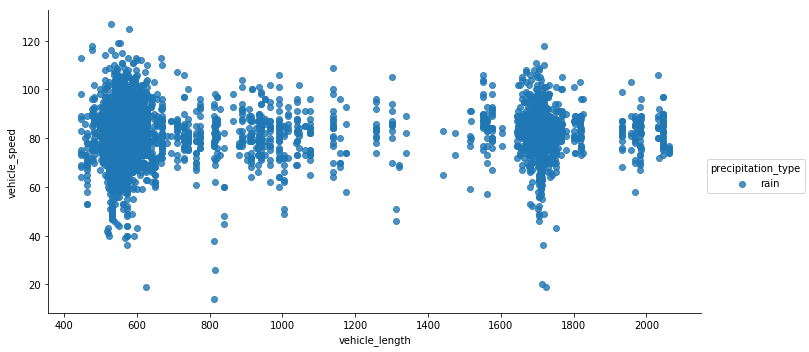

In [47]:
# sns.stripplot(x="light_condition", y="vehicle_speed", data=train);
sns.lmplot(x='vehicle_length', y='vehicle_speed', hue='precipitation_type',aspect=2,size=5,
           data=train.loc[train['precipitation_type'].isin(['rain'])], 
           fit_reg=False)

From above graph, in rain season  , variation of speed from low to 120kph  is observed for vehicle length ~600cm and ~1750cm, rest all lenght vehicle average speed looks like 100kph

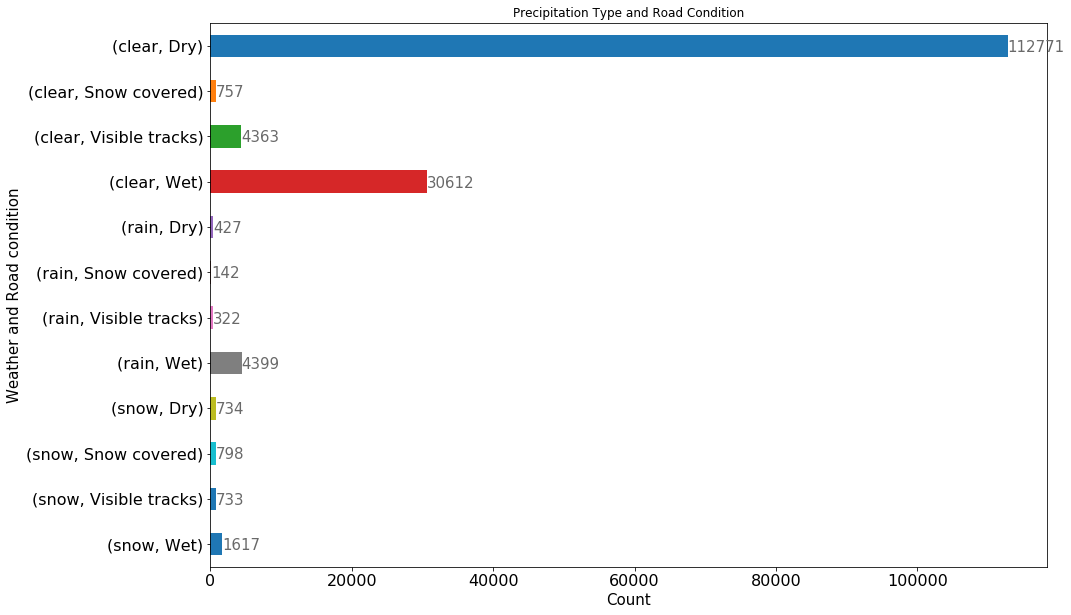

In [48]:
ax = train.groupby(['precipitation_type','road_condition']).size().plot(kind='barh', figsize=(15,10), fontsize=16,
                                                                  title= 'Precipitation Type and Road Condition')

ax.set_ylabel("Weather and Road condition", fontsize=15)
ax.set_xlabel("Count", fontsize=15)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()), 2)), fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

plt.show()

from above plot, we could see clear and Dry observations are more compared to other weather and road conditions combinations, which might lead to bias

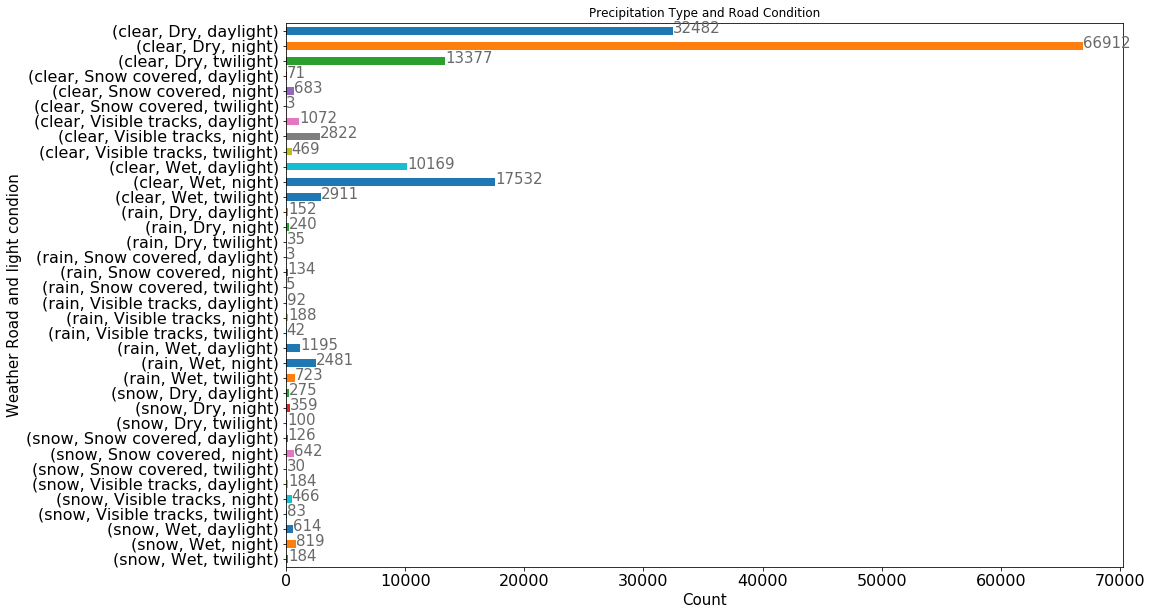

In [49]:
ax = train.groupby(['precipitation_type','road_condition', 'light_condition']).size().plot(kind='barh', figsize=(15,10), fontsize=16,
                                                                  title= 'Precipitation Type and Road Condition')


ax.set_ylabel("Weather Road and light condion", fontsize=15)
ax.set_xlabel("Count", fontsize=15)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()), 2)), fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

plt.show()

From above plot, we can see clear,dry,night observations are high compared other combination of weather type,road conditon and day light condition